# Time Series Analysis of the San Antonio Metro Area

Author: Melody Bass

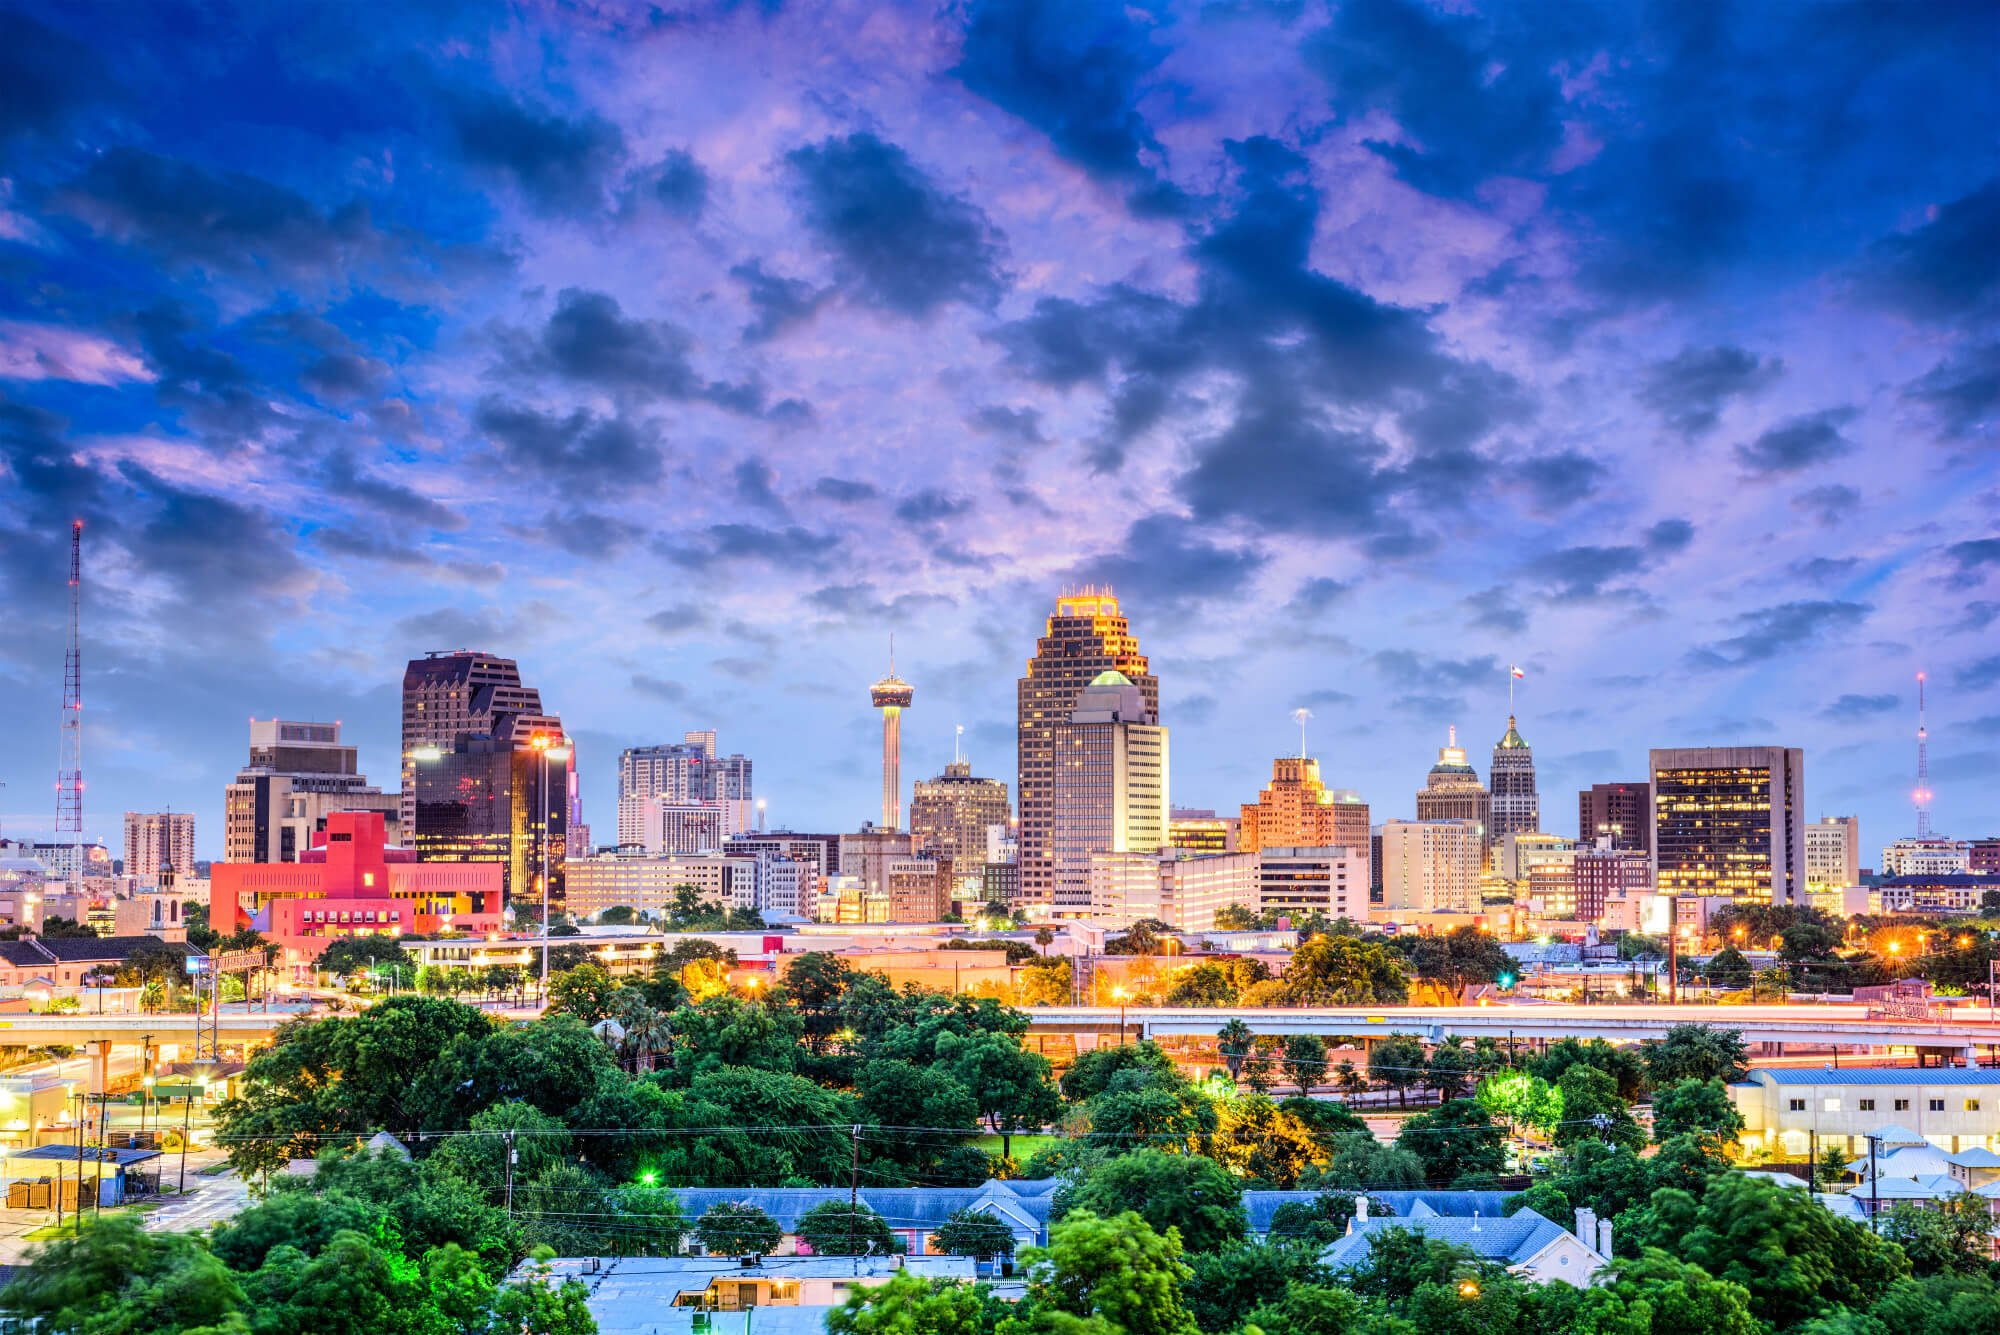

In [101]:
# Basics
import pandas as pd
import numpy as np
import itertools

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.pylab import rcParams
import time

# Modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [102]:
# load in zillow home price data as df
df = pd.read_csv('data/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [103]:
df['Metro'].value_counts()

New York                              779
Los Angeles-Long Beach-Anaheim        347
Chicago                               325
Philadelphia                          281
Washington                            249
Boston                                246
Dallas-Fort Worth                     217
Minneapolis-St Paul                   201
Houston                               187
Pittsburgh                            177
Miami-Fort Lauderdale                 162
Portland                              161
Detroit                               153
Atlanta                               152
Seattle                               141
St. Louis                             140
San Francisco                         134
Kansas City                           127
Phoenix                               126
Baltimore                             122
Tampa                                 118
Riverside                             116
Cincinnati                            109
Denver                            

In [104]:
#Dataframe containing only zips from San Antonio metro

sa_df = df[df['Metro']=='San Antonio']
sa_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000
511,92350,78254,San Antonio,TX,San Antonio,Bexar,512,118200.0,118100.0,118000.0,...,200700,200900,201300,201800,202300,203200,203900,204600,205700,206400
533,92305,78209,San Antonio,TX,San Antonio,Bexar,534,239600.0,239400.0,239100.0,...,389300,391000,394300,396700,397300,397800,399300,401700,403200,402500
636,92324,78228,San Antonio,TX,San Antonio,Bexar,637,59400.0,59400.0,59400.0,...,115700,117100,118400,118900,118900,119600,120800,122200,123700,124800
639,92319,78223,San Antonio,TX,San Antonio,Bexar,640,57400.0,57400.0,57500.0,...,112600,113500,114100,114700,114900,115900,117500,118900,120500,122100
654,92326,78230,San Antonio,TX,San Antonio,Bexar,655,149400.0,149100.0,148900.0,...,259100,260600,261900,263400,264800,265500,266300,267800,269300,270000


In [105]:
sa_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.00000,78.000000,78.000000
mean,92313.269231,78202.974359,4915.756410,118574.358974,118574.358974,118598.717949,118637.179487,118705.128205,118792.307692,118919.230769,...,209450.000000,210360.256410,211416.666667,212305.128205,212937.179487,213852.564103,214932.051282,216239.74359,217925.641026,219064.102564
std,69.915473,116.316739,3837.418925,67589.352954,67681.105645,67779.498286,67900.471679,68040.171285,68190.565233,68377.591943,...,106328.023148,106260.242091,106536.563343,106827.188885,106929.405173,107045.249231,107329.535633,107601.17358,107794.259823,107723.665205
min,92193.000000,78003.000000,32.000000,36100.000000,36100.000000,36200.000000,36200.000000,36300.000000,36400.000000,36500.000000,...,74800.000000,75700.000000,75900.000000,74600.000000,72500.000000,71300.000000,70700.000000,71200.00000,72600.000000,73700.000000
25%,92283.250000,78147.250000,1334.000000,62450.000000,62450.000000,62550.000000,62625.000000,62625.000000,62625.000000,62700.000000,...,128800.000000,131700.000000,132900.000000,132900.000000,132375.000000,132475.000000,133625.000000,135525.00000,137375.000000,138600.000000
50%,92316.500000,78220.500000,4422.500000,101400.000000,101350.000000,101300.000000,101200.000000,101100.000000,101050.000000,101000.000000,...,184050.000000,184700.000000,185350.000000,186100.000000,186550.000000,187050.000000,187850.000000,189000.00000,191550.000000,193050.000000
75%,92342.500000,78246.500000,7801.000000,154200.000000,154125.000000,154150.000000,154300.000000,154375.000000,154100.000000,153925.000000,...,265825.000000,266125.000000,266550.000000,267475.000000,268625.000000,270375.000000,272400.000000,274075.00000,277075.000000,282100.000000
max,92715.000000,78861.000000,14175.000000,404800.000000,406300.000000,407800.000000,409300.000000,410800.000000,412200.000000,413600.000000,...,599800.000000,600600.000000,602600.000000,606100.000000,608800.000000,611000.000000,613400.000000,614600.00000,614500.000000,612600.000000


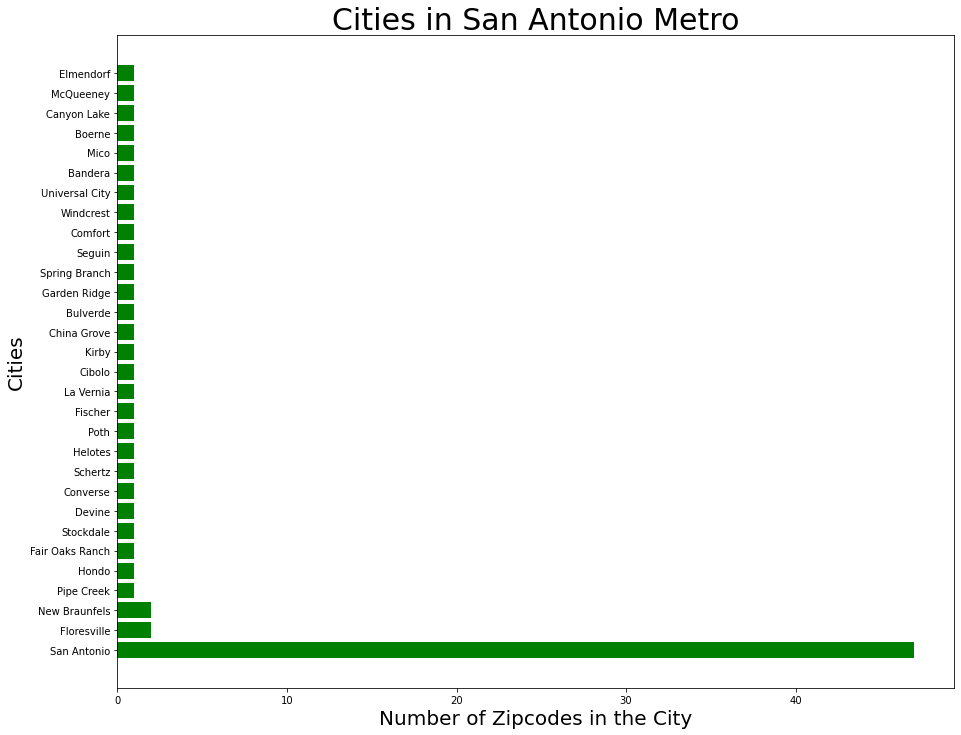

In [106]:
#Visualizing the value counts of zipcodes in each city in the San Antonio metro area


fig, ax = plt.subplots(figsize=(15,12))

y = [a for a in sa_df['City'].value_counts()]

x = [a for a in sa_df['City'].value_counts().keys()]

ax.barh(x,y,color='green')
ax.set_title('Cities in San Antonio Metro',fontsize=30)
ax.set_ylabel('Cities',fontsize=20)
ax.set_xlabel('Number of Zipcodes in the City',fontsize=20);

# Step 2: Data Preprocessing

In [107]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
   as datetime objects.
   NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [108]:

#satx_df = sa_df.drop(['RegionID','City','State','Metro','CountyName','SizeRank'], axis ='columns')
#satx_df

# Step 3: EDA and Visualization

In [109]:
roi_df = sa_df.copy()
roi_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
31,92271,78130,New Braunfels,TX,San Antonio,Comal,32,123900.0,123900.0,123800.0,...,208300,209600,211300,212800,214300,215500,216000,217200,219500,221100
71,92341,78245,San Antonio,TX,San Antonio,Bexar,72,89200.0,89100.0,88900.0,...,159800,160700,161700,162700,163600,164600,165700,166800,167500,167700
113,92336,78240,San Antonio,TX,San Antonio,Bexar,114,100900.0,100800.0,100700.0,...,178800,178800,178600,178900,179400,180300,181600,182800,183900,184800
342,92345,78249,San Antonio,TX,San Antonio,Bexar,343,117900.0,117800.0,117800.0,...,198000,198400,198700,199100,199700,200300,201000,202400,204100,205000
431,92347,78251,San Antonio,TX,San Antonio,Bexar,432,105000.0,104600.0,104200.0,...,179500,180200,181200,182200,182600,182600,182800,183400,183900,184000


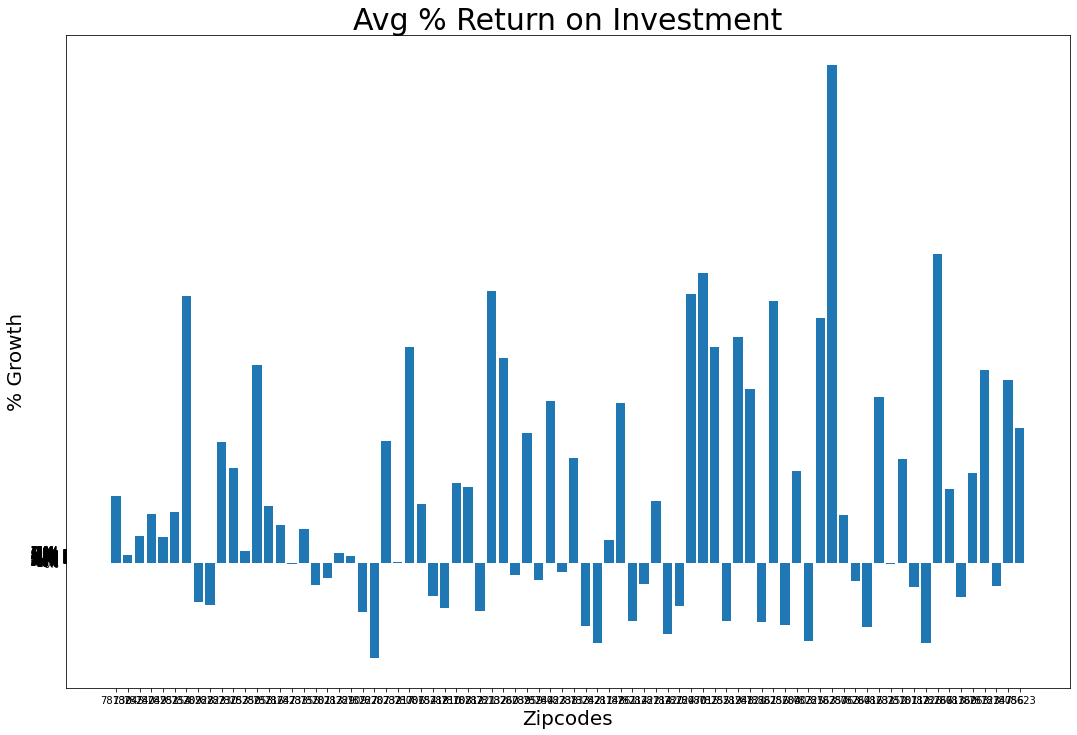

In [110]:

roi_df['roi_5year'] = None
roi_df['roi_5year'] = roi_df['2018-04'].apply(lambda x : ((x-roi_df['2013-04'])/(roi_df['2013-04']))*100)
sa_5_year_roi = roi_df.sort_values('roi_5year',ascending=False).head(10)


fig,ax=plt.subplots(figsize=(18,12))

x_labels = [str(a) for a in roi_df['RegionName']]
x = list(range(1,79))
y = [a for a in roi_df['roi_5year']]

ax.bar(x,y)

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_yticks([a/10 for a in list(range(0,79,1))])
ax.set_yticklabels([str(a*10)+'%' for a in list(range(0,79,1))])
ax.set_ylabel('% Growth',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on Investment',fontsize='30');

In [111]:
sa_5_year_roi.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,roi_5year
8292,92353,78257,San Antonio,TX,San Antonio,Bexar,8293,404800.0,406300.0,407800.0,...,600600,602600,606100,608800,611000,613400,614600,614500,612600,282.158453
10148,92362,78266,Garden Ridge,TX,San Antonio,Comal,10149,249200.0,249500.0,249800.0,...,436500,437700,437400,434400,433700,435900,438500,440400,440900,175.046787
6759,92205,78015,Fair Oaks Ranch,TX,San Antonio,Bexar,6760,254900.0,255200.0,255800.0,...,418900,420800,421800,421900,421700,422600,423800,424000,423600,164.254523
3427,92273,78132,New Braunfels,TX,San Antonio,Comal,3428,204100.0,204200.0,204300.0,...,382200,384800,386600,388500,391400,394200,397600,403000,407100,153.961323
6314,92244,78070,Spring Branch,TX,San Antonio,Comal,6315,201500.0,201700.0,202000.0,...,383500,386100,386600,387500,390300,393600,397100,401600,404900,152.588896
533,92305,78209,San Antonio,TX,San Antonio,Bexar,534,239600.0,239400.0,239100.0,...,391000,394300,396700,397300,397800,399300,401700,403200,402500,151.091703
7573,92352,78256,San Antonio,TX,San Antonio,Bexar,7574,253600.0,254800.0,256000.0,...,390700,389900,391300,394200,395700,396300,397100,397700,398100,148.346850
8244,92295,78163,Bulverde,TX,San Antonio,Comal,8245,199600.0,199500.0,199400.0,...,373900,376200,377500,379100,380600,382200,383500,384000,382900,138.864629
7169,92344,78248,San Antonio,TX,San Antonio,Bexar,7170,210400.0,210200.0,210000.0,...,352000,353600,356100,359200,362100,364100,364900,365300,365600,128.072364
1922,92196,78006,Boerne,TX,San Antonio,Kendall,1923,196600.0,196400.0,196200.0,...,317100,318500,323000,333100,343200,348100,351000,354200,356800,122.582658


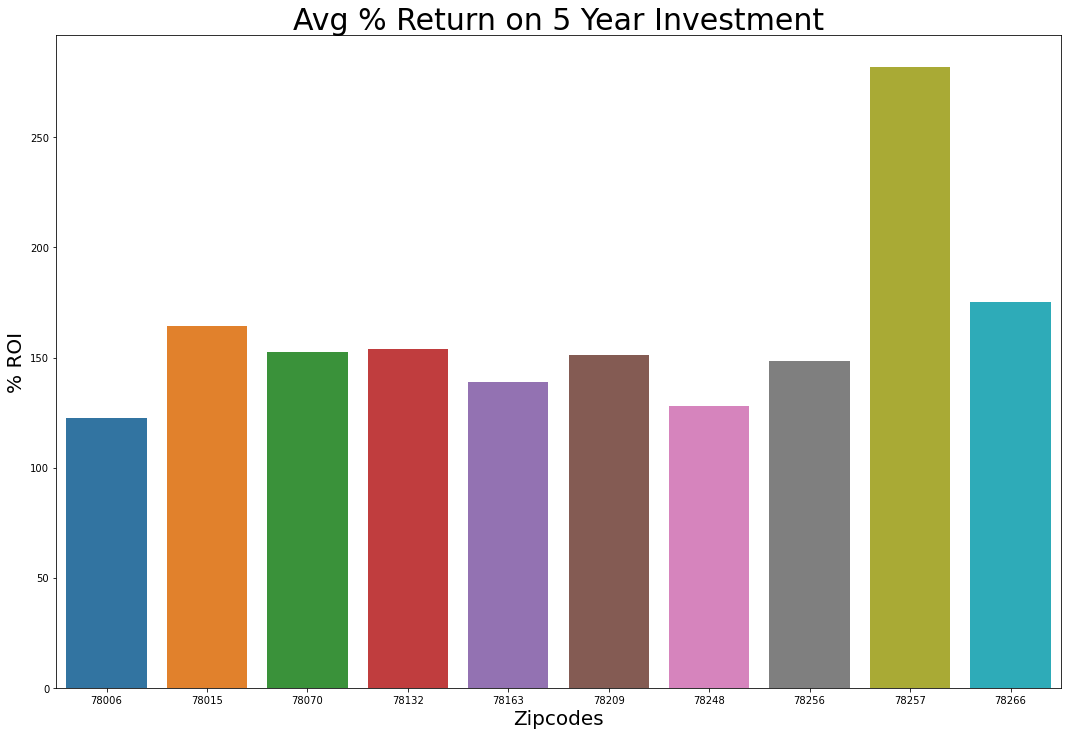

In [112]:

fig,ax=plt.subplots(figsize=(18,12))

x_labels = [str(a) for a in sa_5_year_roi['RegionName']]
sns.barplot(x= sa_5_year_roi['RegionName'], y=sa_5_year_roi['roi_5year'])

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 5 Year Investment',fontsize='30');

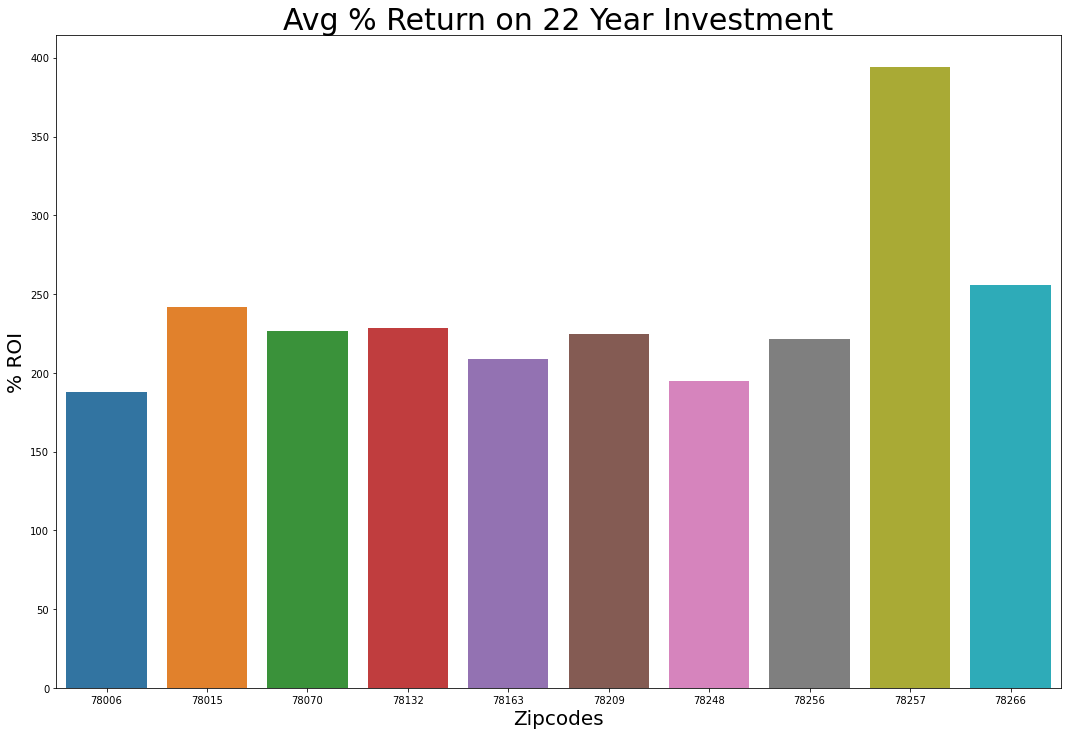

In [113]:
roi_df['roi_22year'] = None
roi_df['roi_22year'] = roi_df['2018-04'].apply(lambda x : ((x-roi_df['1996-04'])/(roi_df['1996-04']))*100)
sa_22_year_roi = roi_df.sort_values('roi_22year',ascending=False).head(10)
fig,ax=plt.subplots(figsize=(18,12))

x_labels = [str(x) for x in sa_22_year_roi['RegionName']]
sns.barplot(x= sa_22_year_roi['RegionName'], y=sa_22_year_roi['roi_22year'])

ax.set_ylabel('% ROI',fontsize='20')
ax.set_xlabel('Zipcodes',fontsize='20')
ax.set_title('Avg % Return on 22 Year Investment',fontsize='30');

In [114]:
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 22}

#matplotlib.rc('font', **font)

#sa_df.plot()
#plt.gcf().autofmt_xdate()

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [115]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], format = '%Y-%m')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [116]:
# Get average of San Antonio metro zipcodes
satx_df_melted = melt_data(sa_df)
satx_df_melted.head()

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205


In [117]:
# Get average of all US zipcodes
df_melted = melt_data(df)
df_melted.head()

,value
time,
1996-04-01,118299.123063
1996-05-01,118419.044139
1996-06-01,118537.423268
1996-07-01,118653.069278
1996-08-01,118780.254312


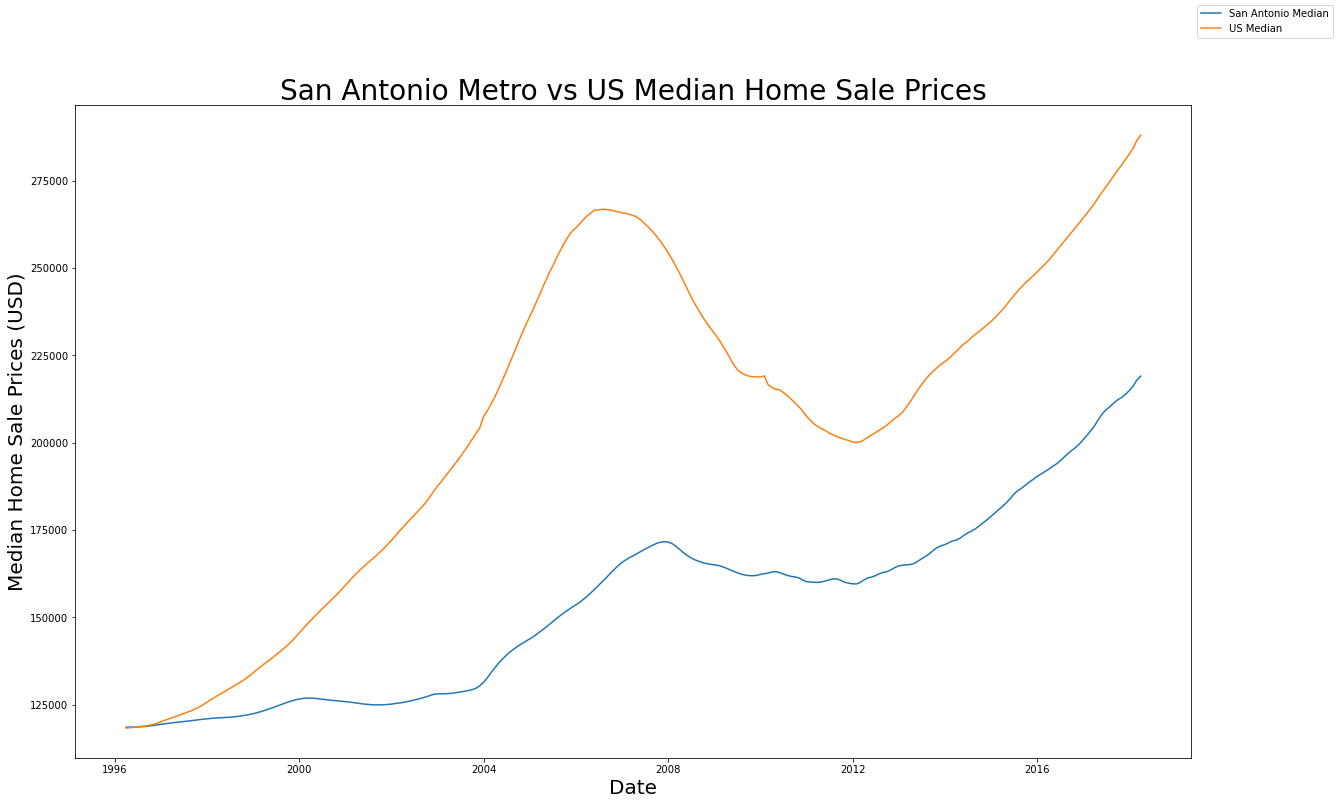

In [118]:
# Plot home value time series for all zip codes averaged

# Define figure
ax = plt.figure(figsize=(20,12))

# Plot
plt.plot(satx_df_melted, label = 'San Antonio Median')
plt.plot(df_melted, label = 'US Median')

# Title, x & y labels
plt.title('San Antonio Metro vs US Median Home Sale Prices', fontsize=28)
plt.ylabel('Median Home Sale Prices (USD)', fontsize=20)
plt.xlabel('Date', fontsize=20)
ax.legend()

plt.show()

In [119]:
#Create dataframe for new melted data
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [120]:
satx_df = melt_df(sa_df)
satx_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,time,value
0,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-04-01,123900.0
1,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-05-01,123900.0
2,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-06-01,123800.0
3,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-07-01,123800.0
4,92271,78130,New Braunfels,TX,San Antonio,Comal,1996-08-01,123800.0


In [121]:
model_df = satx_df.drop(['RegionID','City','State','Metro','CountyName'], axis ='columns')
model_df.head()

,RegionName,time,value
0,78130,1996-04-01,123900.0
1,78130,1996-05-01,123900.0
2,78130,1996-06-01,123800.0
3,78130,1996-07-01,123800.0
4,78130,1996-08-01,123800.0


In [122]:
model_df['time'] = pd.to_datetime(model_df['time'], format = '%Y-%m')
model_df.set_index('time', inplace=True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20670 entries, 1996-04-01 to 2018-04-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionName  20670 non-null  int64  
 1   value       20670 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 484.5 KB


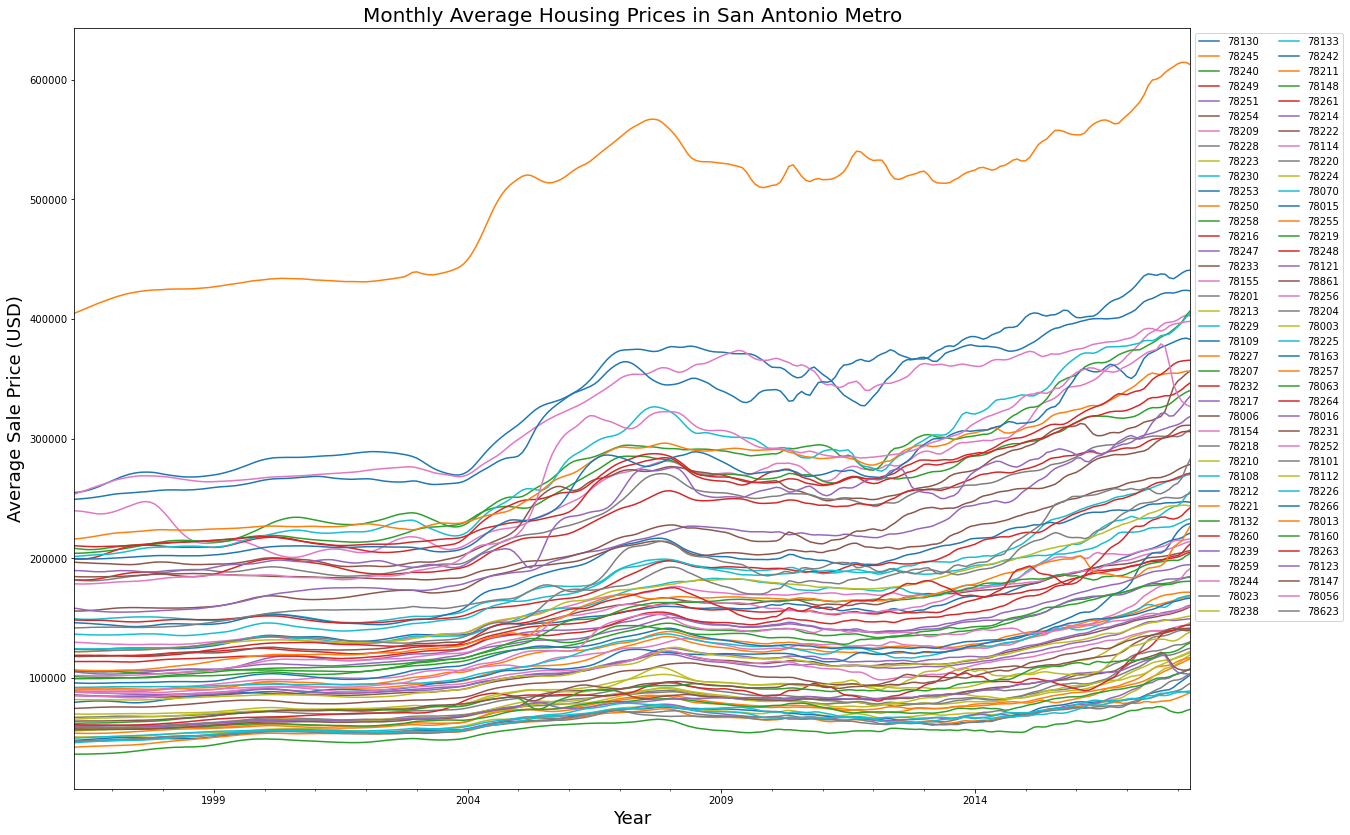

In [123]:
#plot the values grouped by zipcode
plt.figure(figsize=(20,14))
for zipcode in model_df.RegionName.unique():
    model_df.loc[model_df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend(bbox_to_anchor=(1,1), loc='upper left', ncol=2)

plt.xlabel("Year", fontsize = 18)
plt.ylabel("Average Sale Price (USD)", fontsize=18)
plt.title('Monthly Average Housing Prices in San Antonio Metro', fontsize = 20)
plt.show();


In [124]:
satx_df_melted

,value
time,
1996-04-01,118574.358974
1996-05-01,118574.358974
1996-06-01,118598.717949
1996-07-01,118637.179487
1996-08-01,118705.128205
1996-09-01,118792.307692
1996-10-01,118919.230769
1996-11-01,119064.102564
1996-12-01,119229.487179


# Step 5: ARIMA Modeling

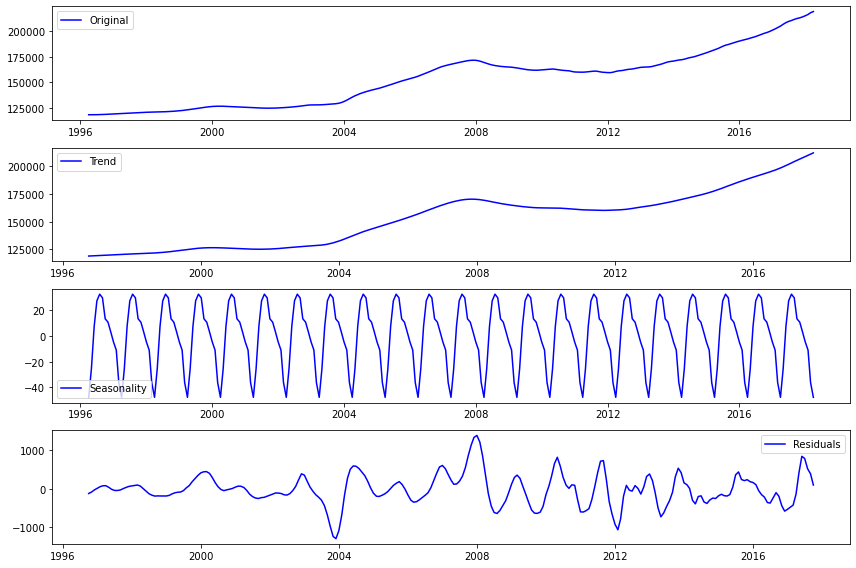

In [96]:
decomposition = sm.tsa.seasonal_decompose(satx_df_melted, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(satx_df_melted, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [97]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [98]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(CO2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue


In [99]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

TypeError: reduction operation 'argmin' not allowed for this dtype

In [ ]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

In [ ]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [ ]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

In [ ]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = CO2['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
# Get the real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Step 6: Interpreting Results